In [35]:
from __future__ import division

import stain_utils as utils
import stainNorm_Reinhard
import stainNorm_Macenko
import stainNorm_Vahadane
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
dir = '/home/mr38/sds_hd/sd18a006/marlen/datasets/stainNormalization/HEV/H.18.4262/stainTools/'
i1 = utils.read_image(dir + "/HE/HE[x=192,y=29376,w=256,h=256].tif")
i2 = utils.read_image(dir + "/longHE/longHE[x=4224,y=30912,w=256,h=256].tif")
i3 = utils.read_image(dir + "/onlyE/onlyE[x=768,y=29376,w=256,h=256].tif")
i4 = utils.read_image(dir + "/onlyH/onlyH[x=2112,y=30912,w=256,h=256].tif")
i5 = utils.read_image(dir + "/shortHE/shortHE[x=1536,y=29952,w=256,h=256].tif")

stack=utils.build_stack((i1,i2,i3,i4,i5))

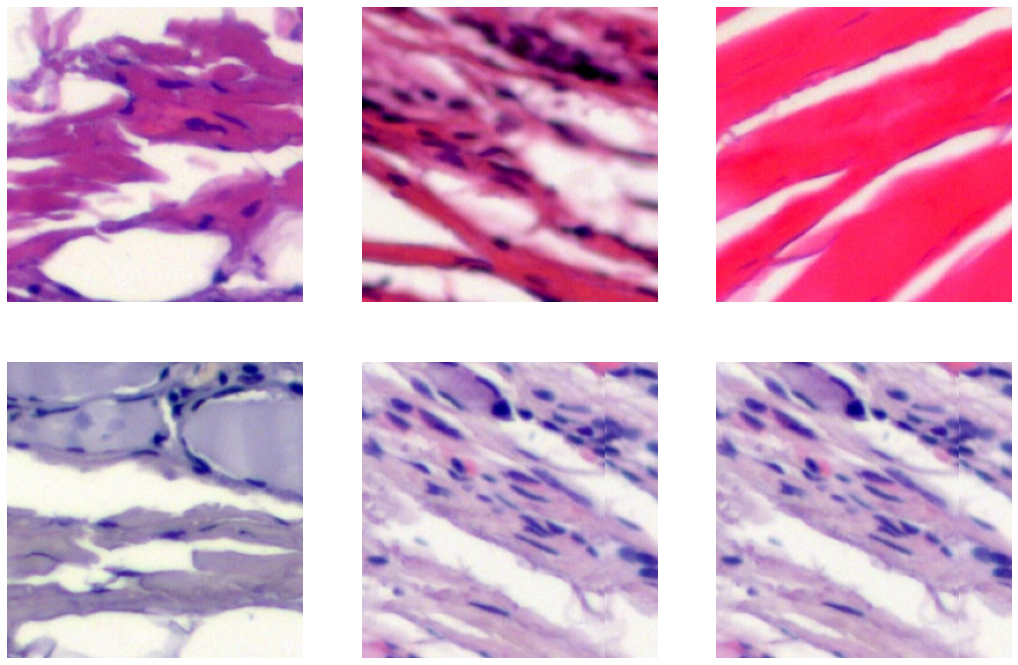

In [37]:
utils.patch_grid(stack,width=3,save_name='./original.pdf')

In [38]:
n=stainNorm_Reinhard.Normalizer()
n.fit(i1)
normalized=utils.build_stack((i1,n.transform(i2),n.transform(i3),n.transform(i4),n.transform(i5)))

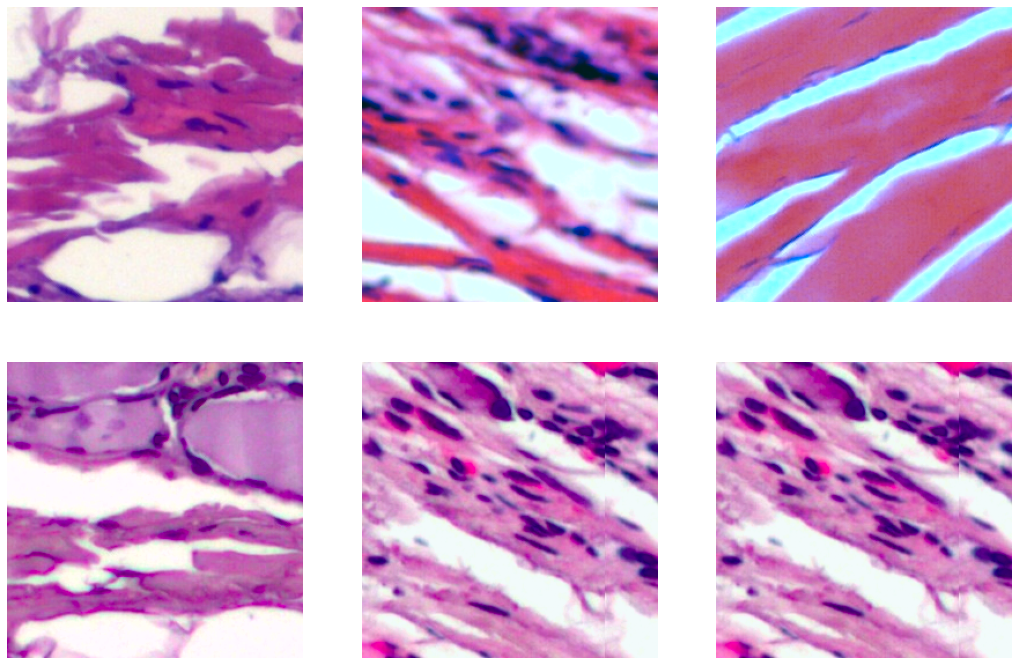

In [39]:
utils.patch_grid(normalized,width=3,save_name='Reinhard.pdf')

In [40]:
n=stainNorm_Macenko.Normalizer()
n.fit(i1)
normalized=utils.build_stack((i1,n.transform(i2),n.transform(i3),n.transform(i4),n.transform(i5)))

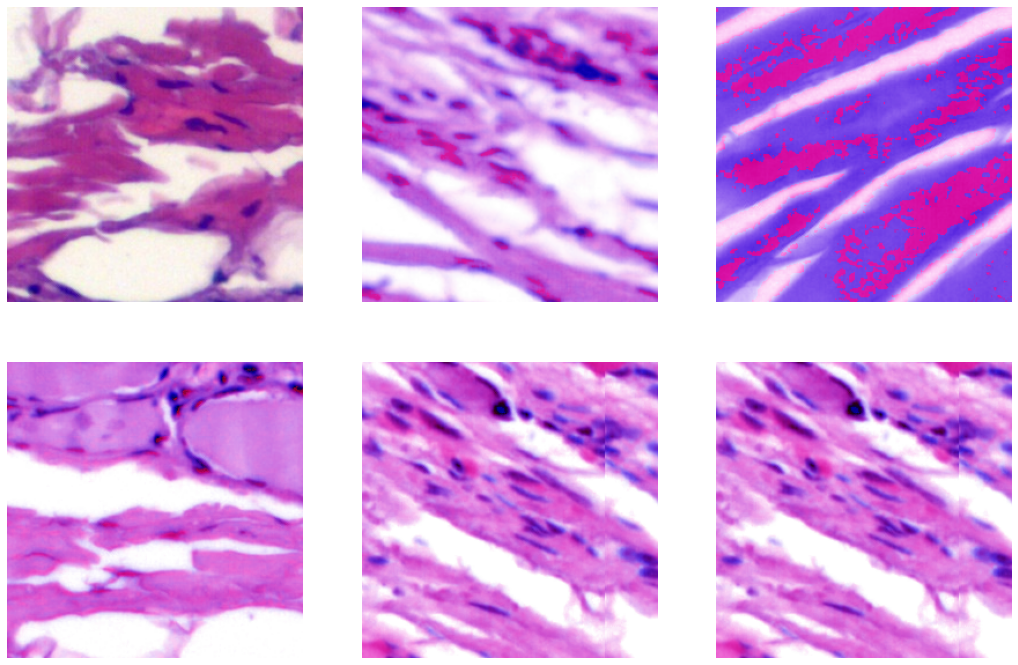

In [41]:
utils.patch_grid(normalized,width=3,save_name='./Macenko.pdf')

In [42]:
hemo=utils.build_stack((n.hematoxylin(i1),n.hematoxylin(i2),n.hematoxylin(i3),n.hematoxylin(i4),n.hematoxylin(i5)))

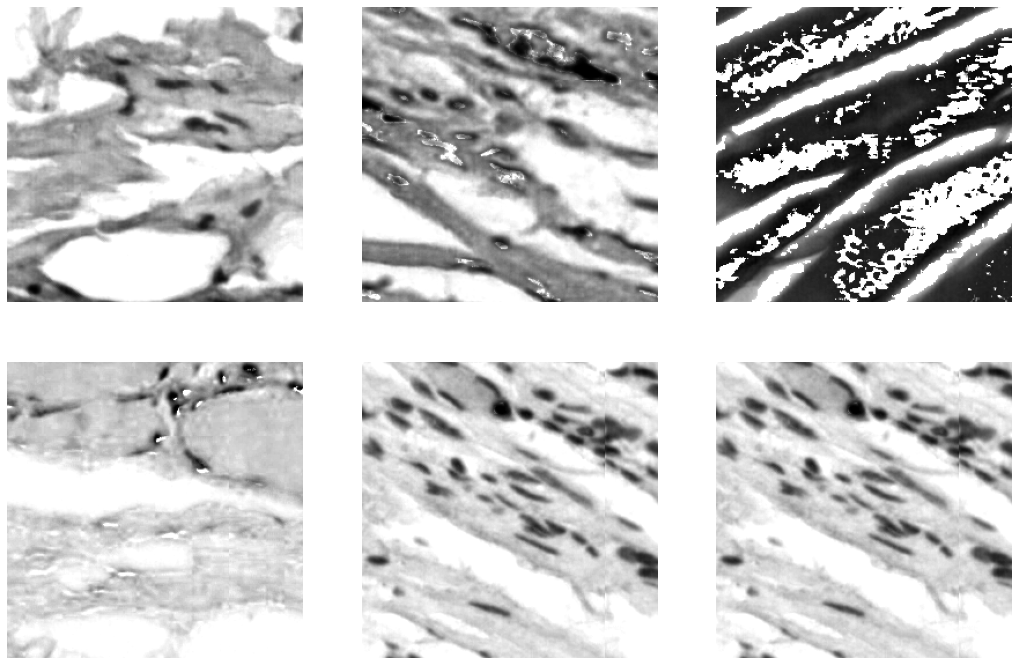

In [43]:
utils.patch_grid(hemo,width=3,save_name='./Macenko_hemo.pdf')

In [44]:
n=stainNorm_Vahadane.Normalizer()
n.fit(i1)
normalized=utils.build_stack((i1,n.transform(i2),n.transform(i3),n.transform(i4),n.transform(i5)))

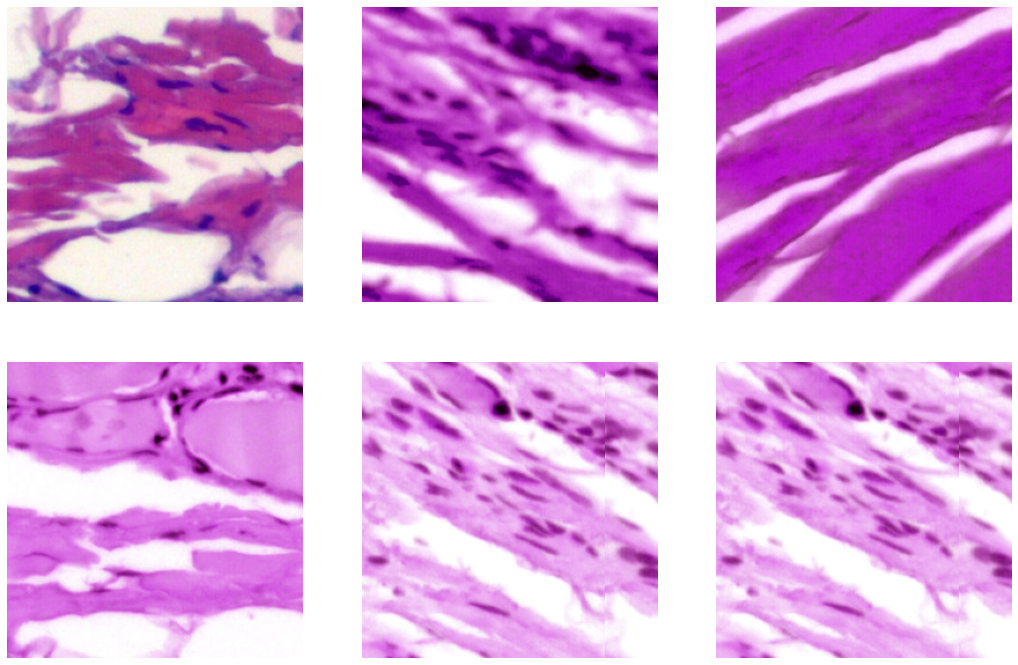

In [45]:
utils.patch_grid(normalized,width=3,save_name='./Vahadane.pdf')

In [46]:
hemo=utils.build_stack((n.hematoxylin(i1),n.hematoxylin(i2),n.hematoxylin(i3),n.hematoxylin(i4),n.hematoxylin(i5)))

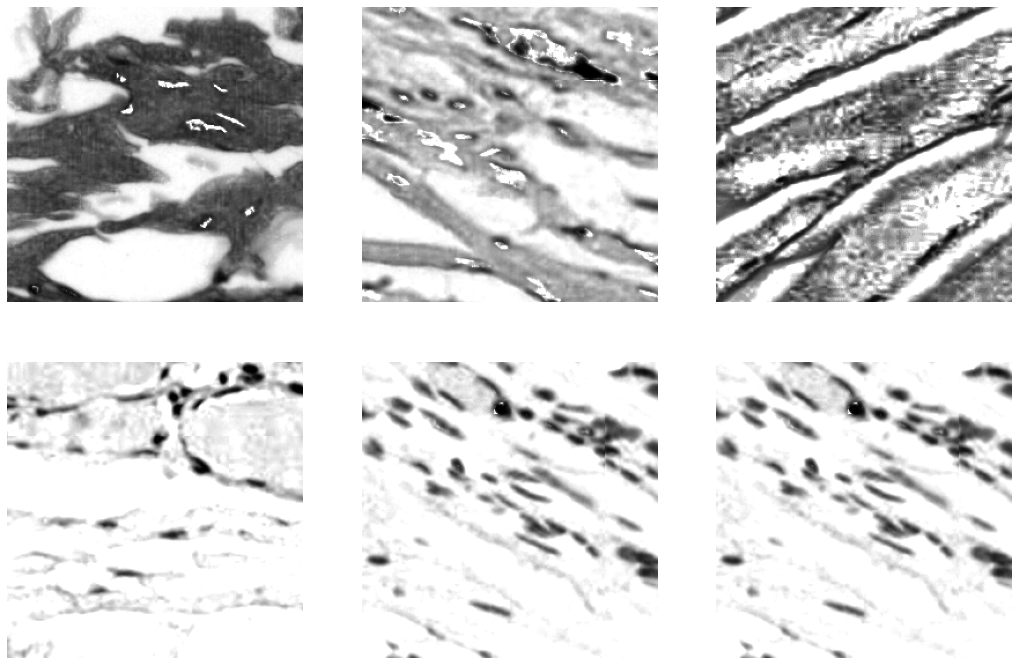

In [47]:
utils.patch_grid(hemo,width=3,save_name='./Vahadane_hemo.pdf')

In [48]:
i1=utils.read_image('./data/i1.png')
i7=utils.read_image('./data/i7.png')
i8=utils.read_image('./data/i8.png')
i9=utils.read_image('./data/i9.png')
stack=utils.build_stack((i1,i7,i8,i9))

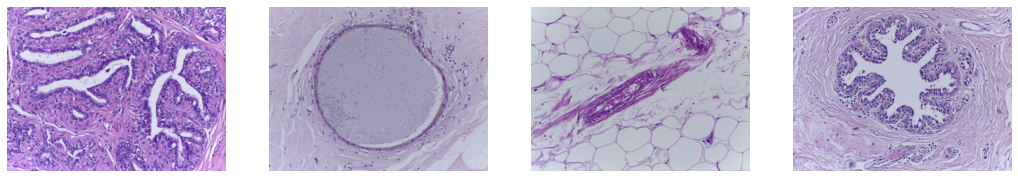

In [49]:
utils.patch_grid(stack,width=4,save_name='./challenge_original.pdf')

In [50]:
n=stainNorm_Reinhard.Normalizer()
n.fit(i1)
normalized=utils.build_stack((i1,n.transform(i7),n.transform(i8),n.transform(i9)))

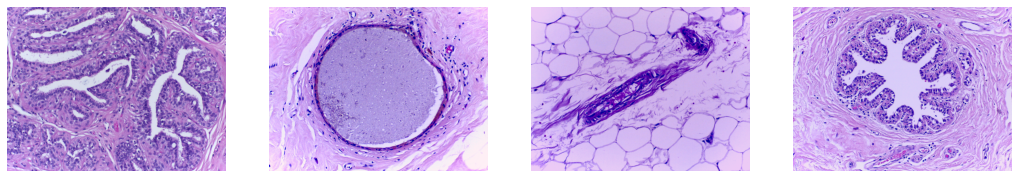

In [51]:
utils.patch_grid(normalized,width=4,save_name='./challenge_Reinhard.pdf')

In [52]:
n=stainNorm_Macenko.Normalizer()
n.fit(i1)
normalized=utils.build_stack((i1,n.transform(i7),n.transform(i8),n.transform(i9)))

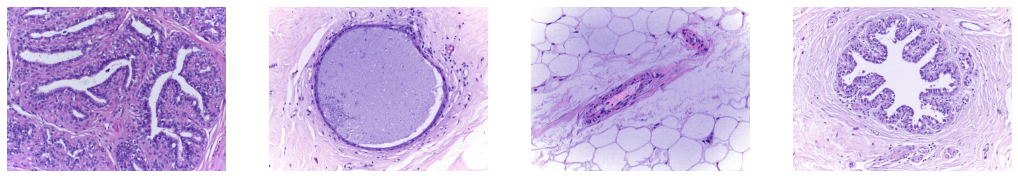

In [53]:
utils.patch_grid(normalized,width=4,save_name='./challenge_Macenko.pdf')

In [54]:
n=stainNorm_Vahadane.Normalizer()
n.fit(i1)
normalized=utils.build_stack((i1,n.transform(i7),n.transform(i8),n.transform(i9)))

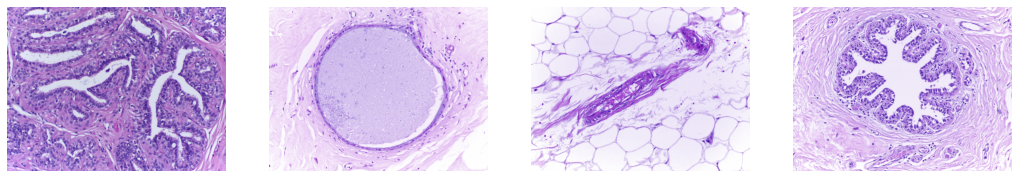

In [55]:
utils.patch_grid(normalized,width=4,save_name='./challenge_Vahadane.pdf')

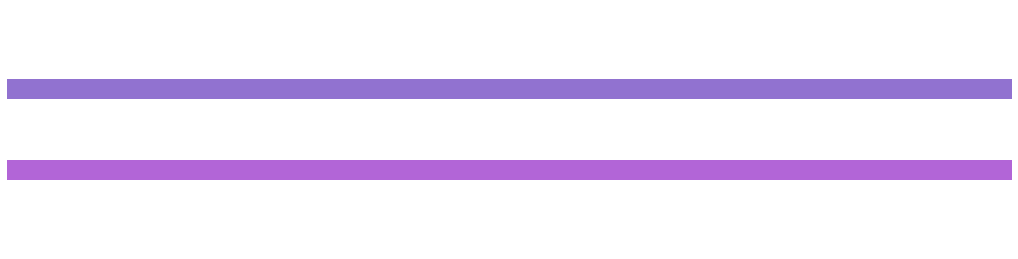

In [56]:
n = stainNorm_Vahadane.Normalizer()
n.fit(i1)
utils.show_colors(n.target_stains())
plt.savefig('./stains.pdf')

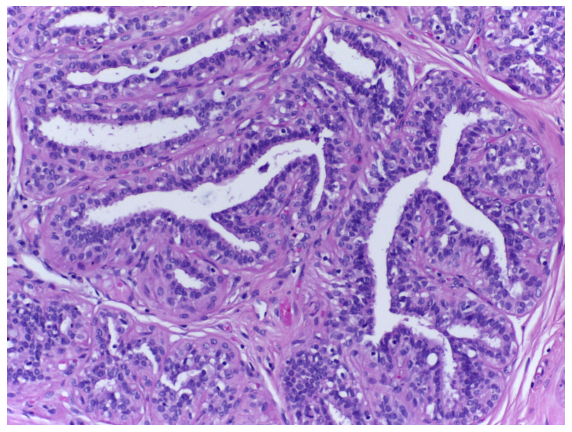

In [57]:
utils.show(i1,now=False)
plt.savefig('./i1.pdf')

222.0


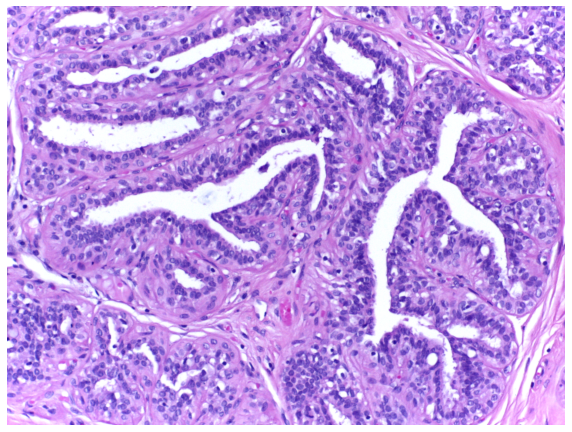

In [58]:
print(np.percentile(i1,90))
utils.show(utils.standardize_brightness(i1))